In [2]:
from keras.datasets import cifar10

In [5]:
df = cifar10.load_data()

In [10]:
df

((array([[[[ 59,  62,  63],
           [ 43,  46,  45],
           [ 50,  48,  43],
           ...,
           [158, 132, 108],
           [152, 125, 102],
           [148, 124, 103]],
  
          [[ 16,  20,  20],
           [  0,   0,   0],
           [ 18,   8,   0],
           ...,
           [123,  88,  55],
           [119,  83,  50],
           [122,  87,  57]],
  
          [[ 25,  24,  21],
           [ 16,   7,   0],
           [ 49,  27,   8],
           ...,
           [118,  84,  50],
           [120,  84,  50],
           [109,  73,  42]],
  
          ...,
  
          [[208, 170,  96],
           [201, 153,  34],
           [198, 161,  26],
           ...,
           [160, 133,  70],
           [ 56,  31,   7],
           [ 53,  34,  20]],
  
          [[180, 139,  96],
           [173, 123,  42],
           [186, 144,  30],
           ...,
           [184, 148,  94],
           [ 97,  62,  34],
           [ 83,  53,  34]],
  
          [[177, 144, 116],
           [16

In [12]:
(X_train,y_train),(X_test,y_test)= df

In [13]:
X_train.shape

(50000, 32, 32, 3)

In [14]:
y_train.shape

(50000, 1)

In [15]:
X_test.shape

(10000, 32, 32, 3)

In [16]:
import matplotlib.pyplot as plt

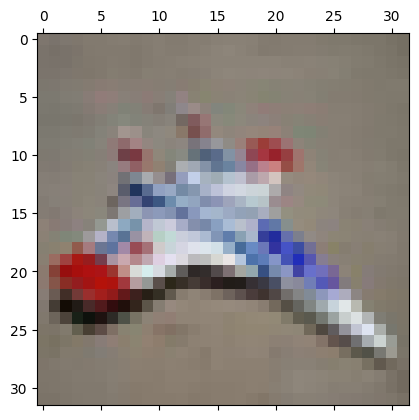

In [21]:
plt.matshow(X_train[30])

In [23]:
y_train[[30]]

array([[0]], dtype=uint8)

# so we need class_names

In [24]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [25]:
from keras.utils import to_categorical

In [26]:
y_train = to_categorical(y_train,10)

In [28]:
y_test = to_categorical(y_test,10)

In [27]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.])

In [29]:
y_test[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.])

# class_name = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [32]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from keras.layers import Conv2D,Flatten,Dense,Input


In [33]:
model  = Sequential([
    Input(shape=(32,32,3)),
    Conv2D(filters=60,kernel_size=(3,3),activation='relu'),
    Conv2D(filters=120,kernel_size=(3,3),activation='relu'),
    Flatten(),
    Dense(10,activation='softmax')
])

In [38]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [39]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 60)     │         1,680 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 28, 28, 120)    │        64,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 94080)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │       940,810 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,007,410 (3.84 MB)

 Trainable params: 1,007,410 (3.84 MB)

 Non-trainable params: 0 (0.00 B)

In [40]:
model.fit(X_train,y_train,epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 148s 94ms/step - accuracy: 0.1197 - loss: 11.3761
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 158s 101ms/step - accuracy: 0.1204 - loss: 2.2932
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 145s 93ms/step - accuracy: 0.1416 - loss: 2.2772
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 145s 93ms/step - accuracy: 0.1667 - loss: 2.2537
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 146s 93ms/step - accuracy: 0.1323 - loss: 2.2578
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 149s 95ms/step - accuracy: 0.1416 - loss: 2.2266
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 148s 95ms/step - accuracy: 0.1525 - loss: 2.2131
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 148s 95ms/step - accuracy: 0.1555 - loss: 2.1888
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 162s 104ms/step - accuracy: 0.1643 - loss: 2.1656
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 165s 105ms/step - accuracy: 0.1883 - loss: 2.1301


# we need to normalize the X_train 

In [41]:
X_train = X_train.astype('float32')/255.0

In [42]:
model.fit(X_train,y_train,epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 164s 105ms/step - accuracy: 0.3475 - loss: 1.8447
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 155s 99ms/step - accuracy: 0.5849 - loss: 1.1904
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 158s 101ms/step - accuracy: 0.6711 - loss: 0.9613
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 162s 104ms/step - accuracy: 0.7332 - loss: 0.7826
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 156s 100ms/step - accuracy: 0.7856 - loss: 0.6387
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 157s 100ms/step - accuracy: 0.8296 - loss: 0.5086
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 156s 99ms/step - accuracy: 0.8757 - loss: 0.3864
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 157s 101ms/step - accuracy: 0.9063 - loss: 0.2936
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 175s 112ms/step - accuracy: 0.9333 - loss: 0.2163
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 167s 107ms/step - accuracy: 0.9542 - loss: 0.1522
